## Data visulization after training model 

In [2]:
# Installing libraries
install.packages("glmnet")
library(tidymodels)
library(tidyverse)
library(glmnet)

# Setting a seed so our analysis is random but reproducible
set.seed(2005)

also installing the dependency ‘RcppEigen’


Warning message in install.packages("glmnet"):
“installation of package ‘RcppEigen’ had non-zero exit status”
Warning message in install.packages("glmnet"):
“installation of package ‘glmnet’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error in library(tidymodels): there is no package called ‘tidymodels’


In [2]:
#read data
training_data <- read.csv("train.csv")
testing_data <- read.csv("test.csv")

#convert Churn from interger to factor from training_data
training_data$Customer_Churn <- as.factor(training_data$Customer_Churn)


#convert Churn from interger to factor from testing_data
testing_data$Customer_Churn <- as.factor(testing_data$Customer_Churn)

#preview the dataset
glimpse(training_data)
glimpse(testing_data)


Rows: 5,000
Columns: 10
$ ID                               <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…
$ Age                              <int> 59, 49, 35, 63, 28, 41, 59, 39, 43, 3…
$ AI_Interaction_Level             <int> 2, 2, 2, 2, 4, 3, 2, 3, 3, 4, 4, 2, 2…
$ Satisfaction_with_AI_Services    <int> 7, 6, 3, 3, 6, 1, 8, 8, 8, 6, 5, 10, …
$ AI_Personalization_Effectiveness <int> 7, 5, 3, 3, 6, 1, 9, 8, 9, 6, 6, 10, …
$ AI_Response_Time                 <int> 2, 1, 3, 2, 1, 3, 1, 2, 2, 1, 2, 2, 1…
$ Overall_Usage_Frequency          <int> 18, 3, 8, 6, 11, 28, 10, 12, 13, 26, …
$ Customer_Service_Interactions    <int> 5, 2, 2, 6, 3, 2, 1, 10, 8, 3, 0, 1, …
$ Change_in_Usage_Patterns         <int> 2, 0, 1, 2, -1, -1, -2, -2, -1, -1, 0…
$ Customer_Churn                   <fct> 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0…
Rows: 1,250
Columns: 10
$ ID                               <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…
$ Age                              <int> 59, 49, 35, 63, 28, 41, 59, 39,

In [3]:
model <- glm(Customer_Churn ~ Satisfaction_with_AI_Services + Age + Customer_Service_Interactions, 
             data = training_data, family = binomial)

summary(model)


Call:
glm(formula = Customer_Churn ~ Satisfaction_with_AI_Services + 
    Age + Customer_Service_Interactions, family = binomial, data = training_data)

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -0.717937   0.125566  -5.718 1.08e-08 ***
Satisfaction_with_AI_Services -0.074996   0.010178  -7.368 1.73e-13 ***
Age                            0.018115   0.002324   7.795 6.46e-15 ***
Customer_Service_Interactions  0.004333   0.009125   0.475    0.635    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6797.0  on 4999  degrees of freedom
Residual deviance: 6681.9  on 4996  degrees of freedom
AIC: 6689.9

Number of Fisher Scoring iterations: 4


In [4]:
install.packages("coefplot")
library(coefplot)

also installing the dependencies ‘lazyeval’, ‘crosstalk’, ‘useful’, ‘dygraphs’, ‘plotly’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



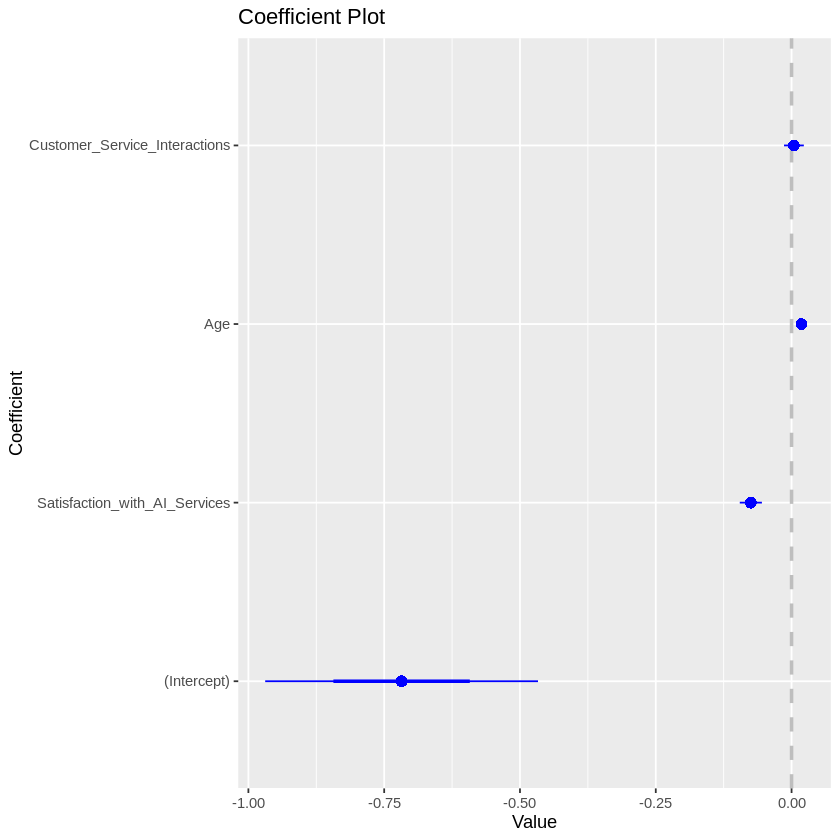

In [5]:
coefplot(model)

`geom_smooth()` using formula = 'y ~ x'
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


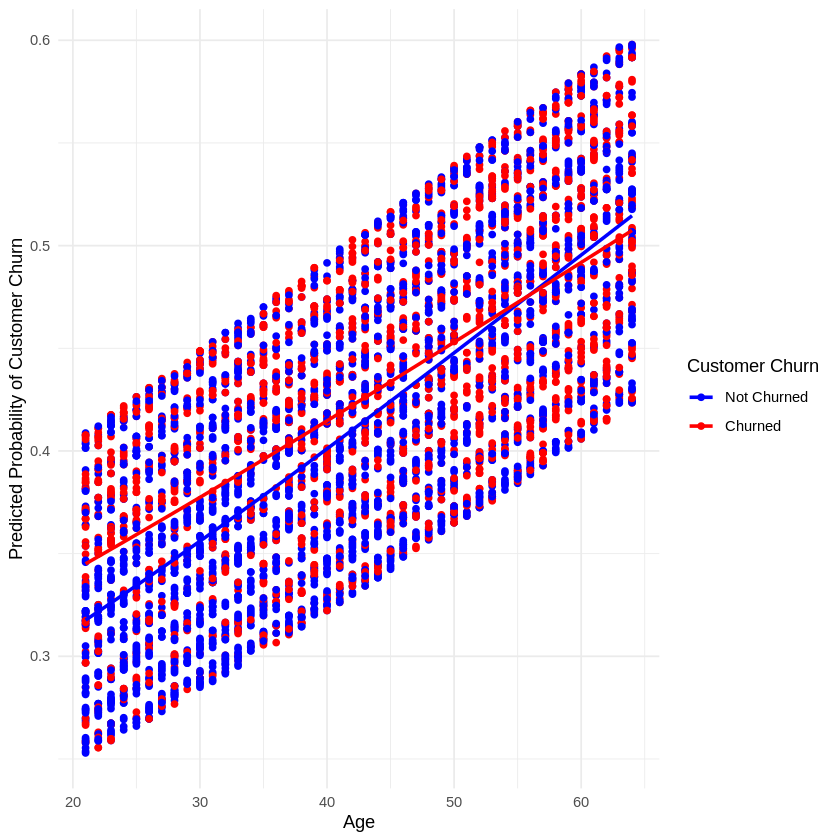

In [6]:
# Load required libraries
library(ggplot2)

# Predict probabilities using the model
training_data$predicted_prob <- predict(model, type = "response")

# Create logistic regression graph
ggplot(training_data, aes(x = Age, y = predicted_prob, color = factor(Customer_Churn))) +
  geom_point() +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE) +
  labs(x = "Age", y = "Predicted Probability of Customer Churn", color = "Customer Churn") +
  scale_color_manual(values = c("blue", "red"), labels = c("Not Churned", "Churned")) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


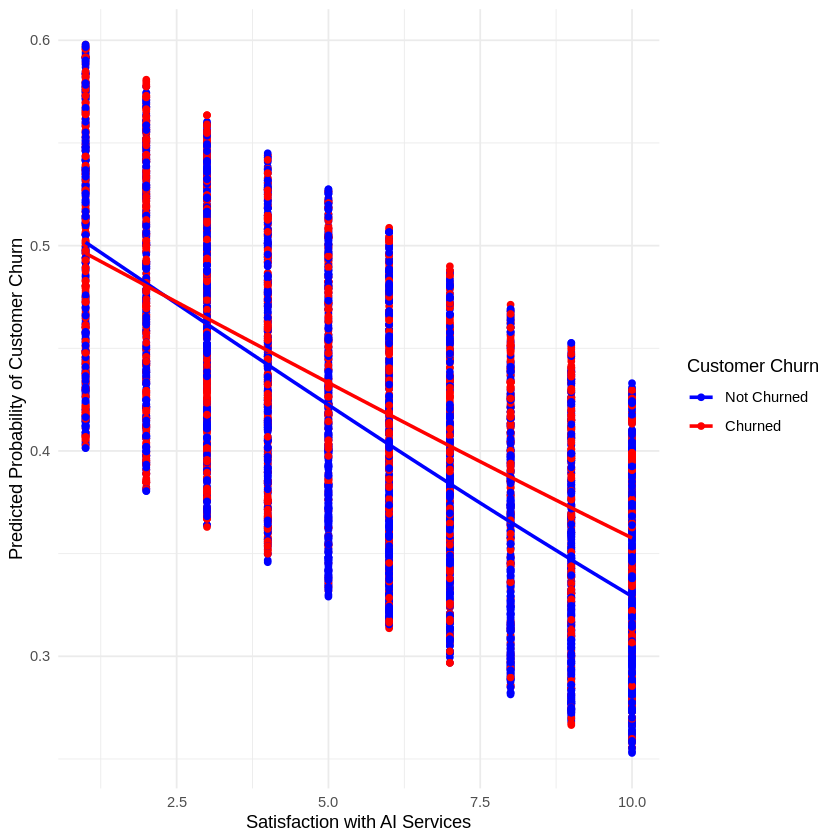

In [7]:
# Create logistic regression graph
ggplot(training_data, aes(x = Satisfaction_with_AI_Services, y = predicted_prob, color = factor(Customer_Churn))) +
  geom_point() +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE) +
  labs(x = "Satisfaction with AI Services", y = "Predicted Probability of Customer Churn", color = "Customer Churn") +
  scale_color_manual(values = c("blue", "red"), labels = c("Not Churned", "Churned")) +
  theme_minimal()


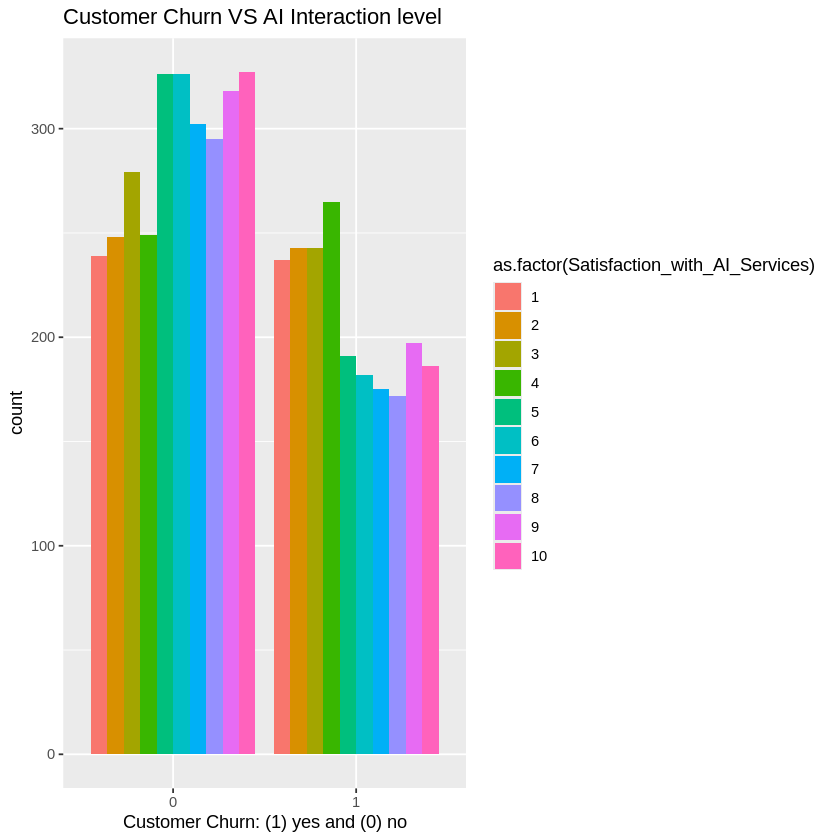

In [8]:
ggplot(training_data, aes(x = Customer_Churn, fill = as.factor(Satisfaction_with_AI_Services), group = Satisfaction_with_AI_Services)) +
    geom_bar(position = "dodge") +
    labs(x = "Customer Churn: (1) yes and (0) no", 
         title = "Customer Churn VS AI Interaction level")